In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df=pd.read_csv("dataset/MTA_Subway_Hourly_Ridership__Beginning_February_2022_20240314.csv")

In [3]:
df.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,01/15/2023 12:00:00 AM,subway,1,"Astoria-Ditmars Blvd (N,W)",Queens,metrocard,Metrocard - Full Fare,12,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543)
1,01/15/2023 12:00:00 AM,subway,1,"Astoria-Ditmars Blvd (N,W)",Queens,metrocard,Metrocard - Other,3,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543)
2,01/15/2023 12:00:00 AM,subway,1,"Astoria-Ditmars Blvd (N,W)",Queens,metrocard,Metrocard - Fair Fare,2,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543)
3,01/15/2023 12:00:00 AM,subway,1,"Astoria-Ditmars Blvd (N,W)",Queens,metrocard,Metrocard - Unlimited 30-Day,5,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543)
4,01/15/2023 12:00:00 AM,subway,1,"Astoria-Ditmars Blvd (N,W)",Queens,metrocard,Metrocard - Unlimited 7-Day,6,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543)


In [4]:
df.isnull().sum()

transit_timestamp      0
transit_mode           0
station_complex_id     0
station_complex        0
borough                0
payment_method         0
fare_class_category    0
ridership              0
transfers              0
latitude               0
longitude              0
Georeference           0
dtype: int64

In [5]:
df.dtypes

transit_timestamp       object
transit_mode            object
station_complex_id      object
station_complex         object
borough                 object
payment_method          object
fare_class_category     object
ridership                int64
transfers                int64
latitude               float64
longitude              float64
Georeference            object
dtype: object

In [6]:
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], format='%m/%d/%Y %I:%M:%S %p')

In [7]:
df['station_complex'] = df['station_complex'].str.replace(r'\(.*\)', '', regex=True)

In [8]:
df['date']=pd.to_datetime(df['transit_timestamp']).dt.date

In [9]:
df['time']=pd.to_datetime(df['transit_timestamp']).dt.time

In [10]:
df['day_of_week'] = df['transit_timestamp'].dt.day_name()

In [11]:
df.dtypes

transit_timestamp      datetime64[ns]
transit_mode                   object
station_complex_id             object
station_complex                object
borough                        object
payment_method                 object
fare_class_category            object
ridership                       int64
transfers                       int64
latitude                      float64
longitude                     float64
Georeference                   object
date                           object
time                           object
day_of_week                    object
dtype: object

In [12]:
print(df['transit_timestamp'].min())
print(df['transit_timestamp'].max())

2023-01-15 00:00:00
2023-05-15 23:00:00


In [13]:
df.sample(10)

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,date,time,day_of_week
1043507,2023-01-30 06:00:00,subway,620,Court St,Brooklyn,metrocard,Metrocard - Students,6,1,40.693218,-73.989998,POINT (-73.98999786376953 40.69321823120117),2023-01-30,06:00:00,Monday
5298001,2023-04-01 01:00:00,subway,622,Brooklyn Bridge-City Hall,Manhattan,metrocard,Metrocard - Seniors & Disability,5,0,40.713242,-74.003403,POINT (-74.00340270996094 40.71324157714844),2023-04-01,01:00:00,Saturday
4021317,2023-03-14 04:00:00,subway,36,Bay Ridge Av,Brooklyn,metrocard,Metrocard - Unlimited 7-Day,8,0,40.634968,-74.023376,POINT (-74.02337646484375 40.63496780395508),2023-03-14,04:00:00,Tuesday
2685950,2023-02-22 16:00:00,subway,94,Halsey St,Brooklyn,metrocard,Metrocard - Seniors & Disability,2,0,40.686371,-73.916557,POINT (-73.91655731201172 40.686370849609375),2023-02-22,16:00:00,Wednesday
1640759,2023-02-07 18:00:00,subway,238,Smith-9 Sts,Brooklyn,metrocard,Metrocard - Full Fare,51,2,40.673580,-73.995956,POINT (-73.99595642089844 40.673580169677734),2023-02-07,18:00:00,Tuesday
1398612,2023-02-04 05:00:00,subway,100,Hewes St,Brooklyn,metrocard,Metrocard - Unlimited 7-Day,2,0,40.706871,-73.953430,POINT (-73.95343017578125 40.706871032714844),2023-02-04,05:00:00,Saturday
3309652,2023-03-03 16:00:00,subway,240,7 Av,Brooklyn,metrocard,Metrocard - Unlimited 7-Day,46,0,40.666271,-73.980309,POINT (-73.98030853271484 40.6662712097168),2023-03-03,16:00:00,Friday
4204422,2023-03-16 15:00:00,subway,209,Far Rockaway-Mott Av,Queens,metrocard,Metrocard - Seniors & Disability,12,5,40.603996,-73.755402,POINT (-73.75540161132812 40.60399627685547),2023-03-16,15:00:00,Thursday
4975040,2023-03-27 15:00:00,subway,625,Delancey St,Manhattan,omny,OMNY - Full Fare,532,7,40.718613,-73.987434,POINT (-73.98743438720703 40.71861267089844),2023-03-27,15:00:00,Monday
1641940,2023-02-07 18:00:00,subway,386,Mt Eden Av,Bronx,metrocard,Metrocard - Seniors & Disability,3,0,40.844433,-73.914688,POINT (-73.91468811035156 40.84443283081055),2023-02-07,18:00:00,Tuesday


In [14]:
def map_time_to_interval(time):
    if time < dt.time(4, 0, 0):
        return '00:00 - 04:00'
    elif time < dt.time(8, 0, 0):
        return '04:00 - 08:00'
    elif time < dt.time(12, 0, 0):
        return '08:00 - 12:00'
    elif time < dt.time(16, 0, 0):
        return '12:00 - 16:00'
    elif time < dt.time(20, 0, 0):
        return '16:00 - 20:00'
    else:
        return '20:00 - 00:00'

df['time_group'] = df['time'].apply(map_time_to_interval)
df

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,date,time,day_of_week,time_group
0,2023-01-15 00:00:00,subway,1,Astoria-Ditmars Blvd,Queens,metrocard,Metrocard - Full Fare,12,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543),2023-01-15,00:00:00,Sunday,00:00 - 04:00
1,2023-01-15 00:00:00,subway,1,Astoria-Ditmars Blvd,Queens,metrocard,Metrocard - Other,3,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543),2023-01-15,00:00:00,Sunday,00:00 - 04:00
2,2023-01-15 00:00:00,subway,1,Astoria-Ditmars Blvd,Queens,metrocard,Metrocard - Fair Fare,2,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543),2023-01-15,00:00:00,Sunday,00:00 - 04:00
3,2023-01-15 00:00:00,subway,1,Astoria-Ditmars Blvd,Queens,metrocard,Metrocard - Unlimited 30-Day,5,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543),2023-01-15,00:00:00,Sunday,00:00 - 04:00
4,2023-01-15 00:00:00,subway,1,Astoria-Ditmars Blvd,Queens,metrocard,Metrocard - Unlimited 7-Day,6,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543),2023-01-15,00:00:00,Sunday,00:00 - 04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8457197,2023-05-15 23:00:00,tram,TRAM1,RI Tramway,Manhattan,metrocard,Metrocard - Unlimited 7-Day,1,0,40.761338,-73.964155,POINT (-73.964155 40.761338),2023-05-15,23:00:00,Monday,20:00 - 00:00
8457198,2023-05-15 23:00:00,tram,TRAM2,RI Tramway,Manhattan,metrocard,Metrocard - Other,3,0,40.757340,-73.954114,POINT (-73.954114 40.75734),2023-05-15,23:00:00,Monday,20:00 - 00:00
8457199,2023-05-15 23:00:00,tram,TRAM2,RI Tramway,Manhattan,metrocard,Metrocard - Full Fare,11,0,40.757340,-73.954114,POINT (-73.954114 40.75734),2023-05-15,23:00:00,Monday,20:00 - 00:00
8457200,2023-05-15 23:00:00,tram,TRAM2,RI Tramway,Manhattan,metrocard,Metrocard - Unlimited 30-Day,2,0,40.757340,-73.954114,POINT (-73.954114 40.75734),2023-05-15,23:00:00,Monday,20:00 - 00:00


In [15]:
df2=df.loc[::,['station_complex_id','station_complex','ridership','date','time','day_of_week','time_group']]
df2.sample(10)

,station_complex_id,station_complex,ridership,date,time,day_of_week,time_group
4678167,1,Astoria-Ditmars Blvd,215,2023-03-23,09:00:00,Thursday,08:00 - 12:00
7725813,246,Avenue I,8,2023-05-05,13:00:00,Friday,12:00 - 16:00
2828757,205,Beach 60 St,4,2023-02-24,16:00:00,Friday,16:00 - 20:00
2615184,35,59 St,106,2023-02-21,17:00:00,Tuesday,16:00 - 20:00
4494552,298,207 St,17,2023-03-20,19:00:00,Monday,16:00 - 20:00
2026026,76,Bay Pkwy,215,2023-02-13,08:00:00,Monday,08:00 - 12:00
7198419,153,125 St,12,2023-04-28,02:00:00,Friday,00:00 - 04:00
4152815,395,103 St,4,2023-03-15,21:00:00,Wednesday,20:00 - 00:00
5003027,26,DeKalb Av,11,2023-03-28,01:00:00,Tuesday,00:00 - 04:00
347253,31,25 St,6,2023-01-19,23:00:00,Thursday,20:00 - 00:00


In [16]:
grouped_times = df2.groupby("time_group")['ridership'].sum()
time_group = grouped_times.reset_index().sort_values("ridership", ascending = False)
time_group

,time_group,ridership
4,16:00 - 20:00,115888323
3,12:00 - 16:00,87649378
2,08:00 - 12:00,86142762
1,04:00 - 08:00,48191123
5,20:00 - 00:00,39853056
0,00:00 - 04:00,6012483


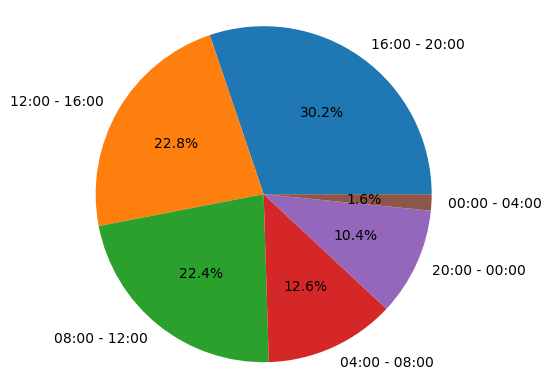

In [17]:
labels = time_group['time_group']
sizes = time_group['ridership']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
plt.show()

In [18]:
df3 = df.groupby('borough')['ridership'].sum()
grouped_borough = df3.reset_index().sort_values('ridership', ascending=False)
grouped_borough

,borough,ridership
2,Manhattan,209270611
1,Brooklyn,87488121
3,Queens,57615034
0,Bronx,28684420
4,Staten Island,678939


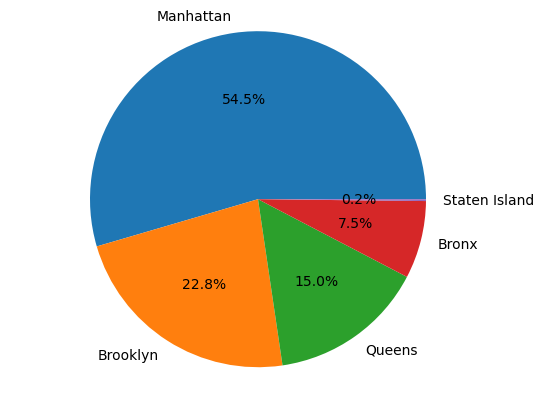

In [19]:
labels = grouped_borough['borough']
sizes = grouped_borough['ridership']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
plt.show()

In [20]:
grouped_stations=df.groupby(['station_complex'])[['ridership']].sum().sort_values('ridership', ascending=False).reset_index().head(10)
grouped_stations

,station_complex,ridership
0,Times Sq-42 St,13549874
1,34 St-Penn Station,10316252
2,Grand Central-42 St,9578004
3,86 St,8457725
4,34 St-Herald Sq,7663080
5,23 St,7568576
6,14 St,7254256
7,14 St-Union Sq,7097802
8,Fulton St,6198145
9,96 St,5928550


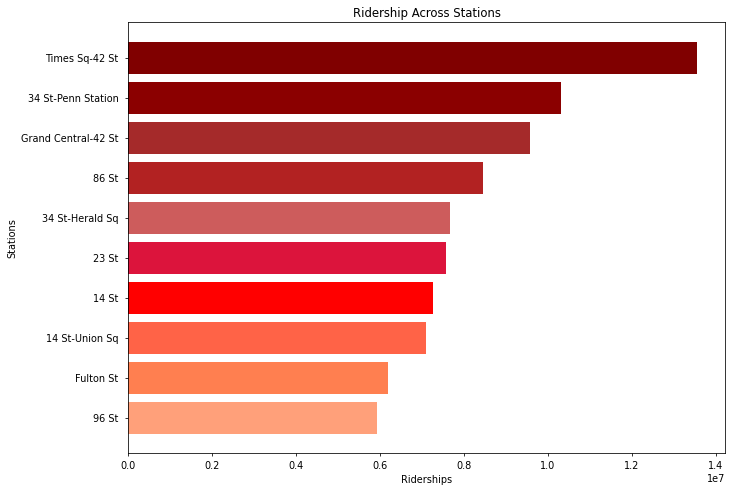

In [21]:
plt.figure(figsize=(11, 8), dpi=70)
plt.barh(grouped_stations.station_complex, grouped_stations.ridership, color=['#800000', '#8B0000', '#A52A2A', '#B22222', '#CD5C5C', '#DC143C', '#FF0000', '#FF6347', '#FF7F50', '#FFA07A'])
plt.gca().invert_yaxis()
plt.xlabel("Riderships")
plt.ylabel("Stations")
plt.title("Ridership Across Stations")
plt.show()

In [22]:
df.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,date,time,day_of_week,time_group
0,2023-01-15,subway,1,Astoria-Ditmars Blvd,Queens,metrocard,Metrocard - Full Fare,12,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543),2023-01-15,00:00:00,Sunday,00:00 - 04:00
1,2023-01-15,subway,1,Astoria-Ditmars Blvd,Queens,metrocard,Metrocard - Other,3,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543),2023-01-15,00:00:00,Sunday,00:00 - 04:00
2,2023-01-15,subway,1,Astoria-Ditmars Blvd,Queens,metrocard,Metrocard - Fair Fare,2,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543),2023-01-15,00:00:00,Sunday,00:00 - 04:00
3,2023-01-15,subway,1,Astoria-Ditmars Blvd,Queens,metrocard,Metrocard - Unlimited 30-Day,5,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543),2023-01-15,00:00:00,Sunday,00:00 - 04:00
4,2023-01-15,subway,1,Astoria-Ditmars Blvd,Queens,metrocard,Metrocard - Unlimited 7-Day,6,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543),2023-01-15,00:00:00,Sunday,00:00 - 04:00


In [23]:
grouped_days = df.groupby(['day_of_week'])[['ridership']].sum().sort_values('ridership').reset_index()
grouped_days

,day_of_week,ridership
0,Sunday,32618775
1,Saturday,38711696
2,Monday,59520260
3,Friday,59648144
4,Tuesday,63664453
5,Thursday,64607158
6,Wednesday,64966639


In [24]:
consecutive_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
grouped_days["day_of_week"] = pd.Categorical(grouped_days["day_of_week"], categories=consecutive_days, ordered=True)
grouped_days= grouped_days.sort_values("day_of_week")
grouped_days

,day_of_week,ridership
2,Monday,59520260
4,Tuesday,63664453
6,Wednesday,64966639
5,Thursday,64607158
3,Friday,59648144
1,Saturday,38711696
0,Sunday,32618775


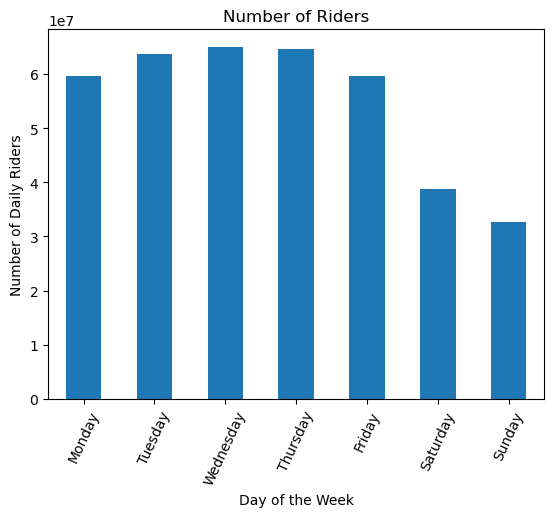

In [25]:
grouped_days['ridership'].plot(kind='bar')
plt.title('Number of Riders')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Daily Riders')
plt.xticks(rotation=45)
plt.xticks(range(7), consecutive_days, rotation=65)
plt.show()

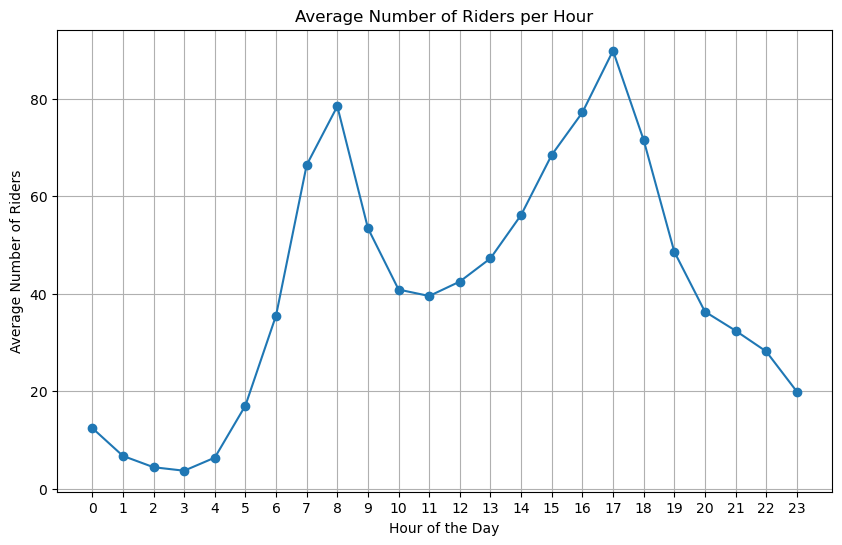

In [26]:
df['hour'] = df['transit_timestamp'].dt.hour
average_riders_per_hour = df.groupby('hour')['ridership'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_riders_per_hour.index, average_riders_per_hour.values, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Riders')
plt.title('Average Number of Riders per Hour')
plt.xticks(average_riders_per_hour.index)
plt.grid(True)
plt.show()

In [27]:
df2.head()

,station_complex_id,station_complex,ridership,date,time,day_of_week,time_group
0,1,Astoria-Ditmars Blvd,12,2023-01-15,00:00:00,Sunday,00:00 - 04:00
1,1,Astoria-Ditmars Blvd,3,2023-01-15,00:00:00,Sunday,00:00 - 04:00
2,1,Astoria-Ditmars Blvd,2,2023-01-15,00:00:00,Sunday,00:00 - 04:00
3,1,Astoria-Ditmars Blvd,5,2023-01-15,00:00:00,Sunday,00:00 - 04:00
4,1,Astoria-Ditmars Blvd,6,2023-01-15,00:00:00,Sunday,00:00 - 04:00


In [28]:
busiest_station=df2[(df2['station_complex']=='Times Sq-42 St ')]
busiest_station.head()

,station_complex_id,station_complex,ridership,date,time,day_of_week,time_group
1805,611,Times Sq-42 St,53,2023-01-15,00:00:00,Sunday,00:00 - 04:00
1806,611,Times Sq-42 St,470,2023-01-15,00:00:00,Sunday,00:00 - 04:00
1807,611,Times Sq-42 St,45,2023-01-15,00:00:00,Sunday,00:00 - 04:00
1808,611,Times Sq-42 St,173,2023-01-15,00:00:00,Sunday,00:00 - 04:00
1809,611,Times Sq-42 St,24,2023-01-15,00:00:00,Sunday,00:00 - 04:00


In [29]:
busiest_station_total_ridership = busiest_station.groupby(["station_complex", "day_of_week", "time_group"]).agg({"ridership": "sum"}).reset_index()
busiest_station_total_ridership.sample(10)

,station_complex,day_of_week,time_group,ridership
39,Times Sq-42 St,Wednesday,12:00 - 16:00,358920
0,Times Sq-42 St,Friday,00:00 - 04:00,52726
38,Times Sq-42 St,Wednesday,08:00 - 12:00,497777
31,Times Sq-42 St,Tuesday,04:00 - 08:00,295733
6,Times Sq-42 St,Monday,00:00 - 04:00,35569
29,Times Sq-42 St,Thursday,20:00 - 00:00,387460
17,Times Sq-42 St,Saturday,20:00 - 00:00,375179
2,Times Sq-42 St,Friday,08:00 - 12:00,386548
37,Times Sq-42 St,Wednesday,04:00 - 08:00,296792
33,Times Sq-42 St,Tuesday,12:00 - 16:00,342444


In [30]:
consecutive_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
busiest_station["day_of_week"] = pd.Categorical(busiest_station["day_of_week"], categories=consecutive_days, ordered=True)
busiest_station = busiest_station.sort_values("day_of_week")
busiest_station

C:\Users\rcoba\AppData\Local\Temp\ipykernel_14428\3269648659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busiest_station["day_of_week"] = pd.Categorical(busiest_station["day_of_week"], categories=consecutive_days, ordered=True)


,station_complex_id,station_complex,ridership,date,time,day_of_week,time_group
8456861,611,Times Sq-42 St,1275,2023-05-15,23:00:00,Monday,20:00 - 00:00
2527968,611,Times Sq-42 St,6,2023-02-20,12:00:00,Monday,12:00 - 16:00
2527967,611,Times Sq-42 St,1710,2023-02-20,12:00:00,Monday,12:00 - 16:00
2527966,611,Times Sq-42 St,505,2023-02-20,12:00:00,Monday,12:00 - 16:00
2527965,611,Times Sq-42 St,254,2023-02-20,12:00:00,Monday,12:00 - 16:00
...,...,...,...,...,...,...,...
6874847,611,Times Sq-42 St,2029,2023-04-23,14:00:00,Sunday,12:00 - 16:00
6874846,611,Times Sq-42 St,7,2023-04-23,14:00:00,Sunday,12:00 - 16:00
6874845,611,Times Sq-42 St,571,2023-04-23,14:00:00,Sunday,12:00 - 16:00
6880852,611,Times Sq-42 St,371,2023-04-23,16:00:00,Sunday,16:00 - 20:00


In [31]:
g_busiest_station = busiest_station.groupby(['day_of_week', 'time_group'], observed=False)[['ridership']].sum().reset_index()
g_busiest_station = g_busiest_station.pivot_table(index='time_group', columns='day_of_week', values='ridership')
g_busiest_station

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
time_group,,,,,,,
00:00 - 04:00,35569.0,33860.0,42075.0,43152.0,52726.0,82517.0,85159.0
04:00 - 08:00,281343.0,295733.0,296792.0,289562.0,246796.0,59312.0,45192.0
08:00 - 12:00,439126.0,491092.0,497777.0,484483.0,386548.0,245982.0,221439.0
12:00 - 16:00,343571.0,342444.0,358920.0,356576.0,374272.0,338366.0,303214.0
16:00 - 20:00,596066.0,680623.0,724226.0,673228.0,565836.0,448630.0,399242.0
20:00 - 00:00,254784.0,354574.0,369312.0,387460.0,403100.0,375179.0,244016.0


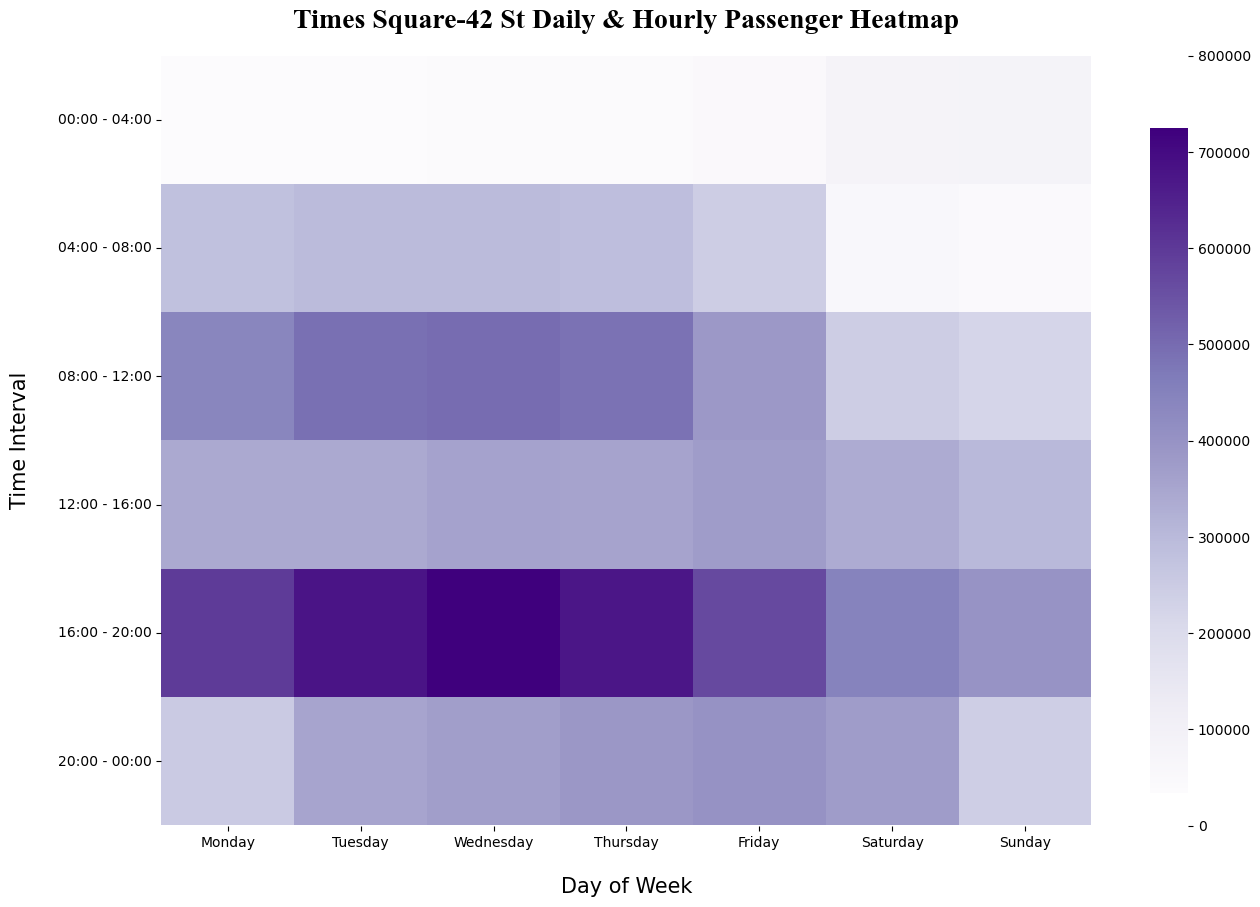

In [32]:
f, time_of_entry_heatmap = plt.subplots(figsize=(15, 10))
time_of_entry_heatmap = sns.heatmap(g_busiest_station, cmap="Purples")

time_of_entry_heatmap.set_title("Times Square-42 St Daily & Hourly Passenger Heatmap",
                             fontname="times new roman",
                             fontsize=20,
                             fontweight='bold',
                             pad=20)

time_of_entry_heatmap.set_xlabel("Day of Week", labelpad = 20, fontsize=15)
time_of_entry_heatmap.set_ylabel("Time Interval", labelpad = 20, fontsize=15)
time_of_entry_heatmap.set_xticklabels(time_of_entry_heatmap.get_xticklabels(), rotation = 0)
time_of_entry_heatmap.set_yticklabels(time_of_entry_heatmap.get_yticklabels(), rotation = 0)
colorbar = time_of_entry_heatmap.collections[0].colorbar
colorbar.set_ticks(colorbar.get_ticks())
plt.savefig('images/TimesSquare.png')
plt.show()

In [33]:
busiest_seven = list(grouped_stations['station_complex'][:7])

In [34]:
busiest_seven

['Times Sq-42 St ',
 '34 St-Penn Station ',
 'Grand Central-42 St ',
 '86 St ',
 '34 St-Herald Sq ',
 '23 St ',
 '14 St ']

In [35]:
consecutive_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["day_of_week"] = pd.Categorical(df["day_of_week"], categories=consecutive_days, ordered=True)
df = df.sort_values("day_of_week")
df

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,date,time,day_of_week,time_group,hour
8457201,2023-05-15 23:00:00,tram,TRAM2,RI Tramway,Manhattan,metrocard,Metrocard - Unlimited 7-Day,5,0,40.757340,-73.954114,POINT (-73.954114 40.75734),2023-05-15,23:00:00,Monday,20:00 - 00:00,23
2050760,2023-02-13 15:00:00,tram,TRAM1,RI Tramway,Manhattan,metrocard,Metrocard - Full Fare,104,18,40.761338,-73.964155,POINT (-73.964155 40.761338),2023-02-13,15:00:00,Monday,12:00 - 16:00,15
2050759,2023-02-13 15:00:00,tram,TRAM1,RI Tramway,Manhattan,metrocard,Metrocard - Other,11,2,40.761338,-73.964155,POINT (-73.964155 40.761338),2023-02-13,15:00:00,Monday,12:00 - 16:00,15
2050758,2023-02-13 15:00:00,subway,99,Lorimer St,Brooklyn,omny,OMNY - Full Fare,41,1,40.703869,-73.947411,POINT (-73.9474105834961 40.7038688659668),2023-02-13,15:00:00,Monday,12:00 - 16:00,15
2050757,2023-02-13 15:00:00,subway,99,Lorimer St,Brooklyn,metrocard,Metrocard - Unlimited 7-Day,25,0,40.703869,-73.947411,POINT (-73.9474105834961 40.7038688659668),2023-02-13,15:00:00,Monday,12:00 - 16:00,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982853,2023-02-12 16:00:00,subway,287,Flushing Av,Brooklyn,metrocard,Metrocard - Unlimited 30-Day,11,0,40.700378,-73.950233,POINT (-73.95023345947266 40.70037841796875),2023-02-12,16:00:00,Sunday,16:00 - 20:00,16
1982854,2023-02-12 16:00:00,subway,287,Flushing Av,Brooklyn,metrocard,Metrocard - Unlimited 7-Day,33,0,40.700378,-73.950233,POINT (-73.95023345947266 40.70037841796875),2023-02-12,16:00:00,Sunday,16:00 - 20:00,16
1982855,2023-02-12 16:00:00,subway,287,Flushing Av,Brooklyn,metrocard,Metrocard - Students,1,0,40.700378,-73.950233,POINT (-73.95023345947266 40.70037841796875),2023-02-12,16:00:00,Sunday,16:00 - 20:00,16
1982779,2023-02-12 16:00:00,subway,276,5 Av/53 St,Manhattan,metrocard,Metrocard - Full Fare,67,0,40.760166,-73.975227,POINT (-73.97522735595703 40.76016616821289),2023-02-12,16:00:00,Sunday,16:00 - 20:00,16


In [36]:
busiest_top_seven = df["station_complex"].isin(busiest_seven)
g_busiest_station = df[busiest_top_seven].groupby(['day_of_week','time_group'], observed=False)[['ridership']].sum().reset_index()
g_busiest_station = g_busiest_station.rename(columns={'day_of_week': 'DAY_OF_WEEK', 'time_group': 'TIME_INTERVAL'})
g_busiest_station = g_busiest_station.pivot_table(index='TIME_INTERVAL', columns='DAY_OF_WEEK', values='ridership')
g_busiest_station

DAY_OF_WEEK,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
TIME_INTERVAL,,,,,,,
00:00 - 04:00,105892.0,115293.0,136412.0,146373.0,181516.0,291407.0,293300.0
04:00 - 08:00,961981.0,1074708.0,1071546.0,1025445.0,807996.0,202100.0,164082.0
08:00 - 12:00,2070364.0,2449803.0,2467956.0,2375248.0,1747282.0,1014194.0,889267.0
12:00 - 16:00,1980843.0,1966338.0,2045192.0,2057233.0,2156803.0,1842652.0,1630490.0
16:00 - 20:00,3365222.0,3833361.0,3909201.0,3829397.0,3222771.0,2129234.0,1792481.0
20:00 - 00:00,1141737.0,1318844.0,1381222.0,1478683.0,1502801.0,1296811.0,914286.0


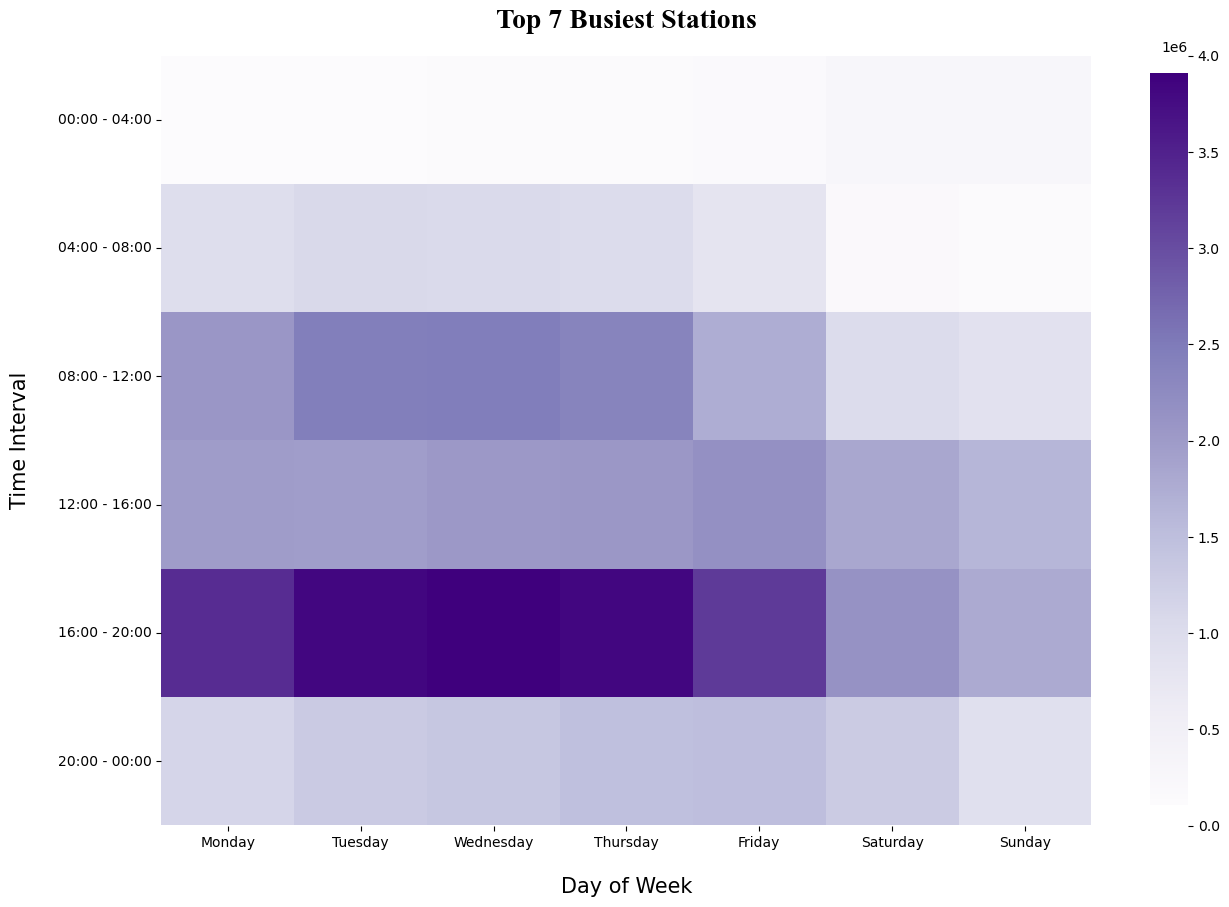

In [37]:
f, heatmap_time_entries = plt.subplots(figsize=(15, 10))
time_of_entry_heatmap = sns.heatmap(g_busiest_station, cmap="Purples")
time_of_entry_heatmap.set_title("Top 7 Busiest Stations", fontname="times new roman", fontsize=20, fontweight='bold', pad=20)
time_of_entry_heatmap.set_xlabel("Day of Week", labelpad = 20, fontsize=15)
time_of_entry_heatmap.set_ylabel("Time Interval", labelpad = 20, fontsize=15)
time_of_entry_heatmap.set_xticklabels(time_of_entry_heatmap.get_xticklabels(), rotation = 0)
time_of_entry_heatmap.set_yticklabels(time_of_entry_heatmap.get_yticklabels(), rotation = 0)
colorbar = time_of_entry_heatmap.collections[0].colorbar
colorbar.set_ticks(colorbar.get_ticks())
plt.show()

In [38]:
g_top7_stations = df[busiest_top_seven].groupby(['day_of_week','station_complex'], observed=False)['ridership'].sum().reset_index()

In [39]:
g_top7_stations

,day_of_week,station_complex,ridership
0,Monday,14 St,1019858
1,Monday,23 St,1152291
2,Monday,34 St-Herald Sq,1140831
3,Monday,34 St-Penn Station,1576343
4,Monday,86 St,1288885
5,Monday,Grand Central-42 St,1497372
6,Monday,Times Sq-42 St,1950459
7,Tuesday,14 St,1135023
8,Tuesday,23 St,1306071
9,Tuesday,34 St-Herald Sq,1247975


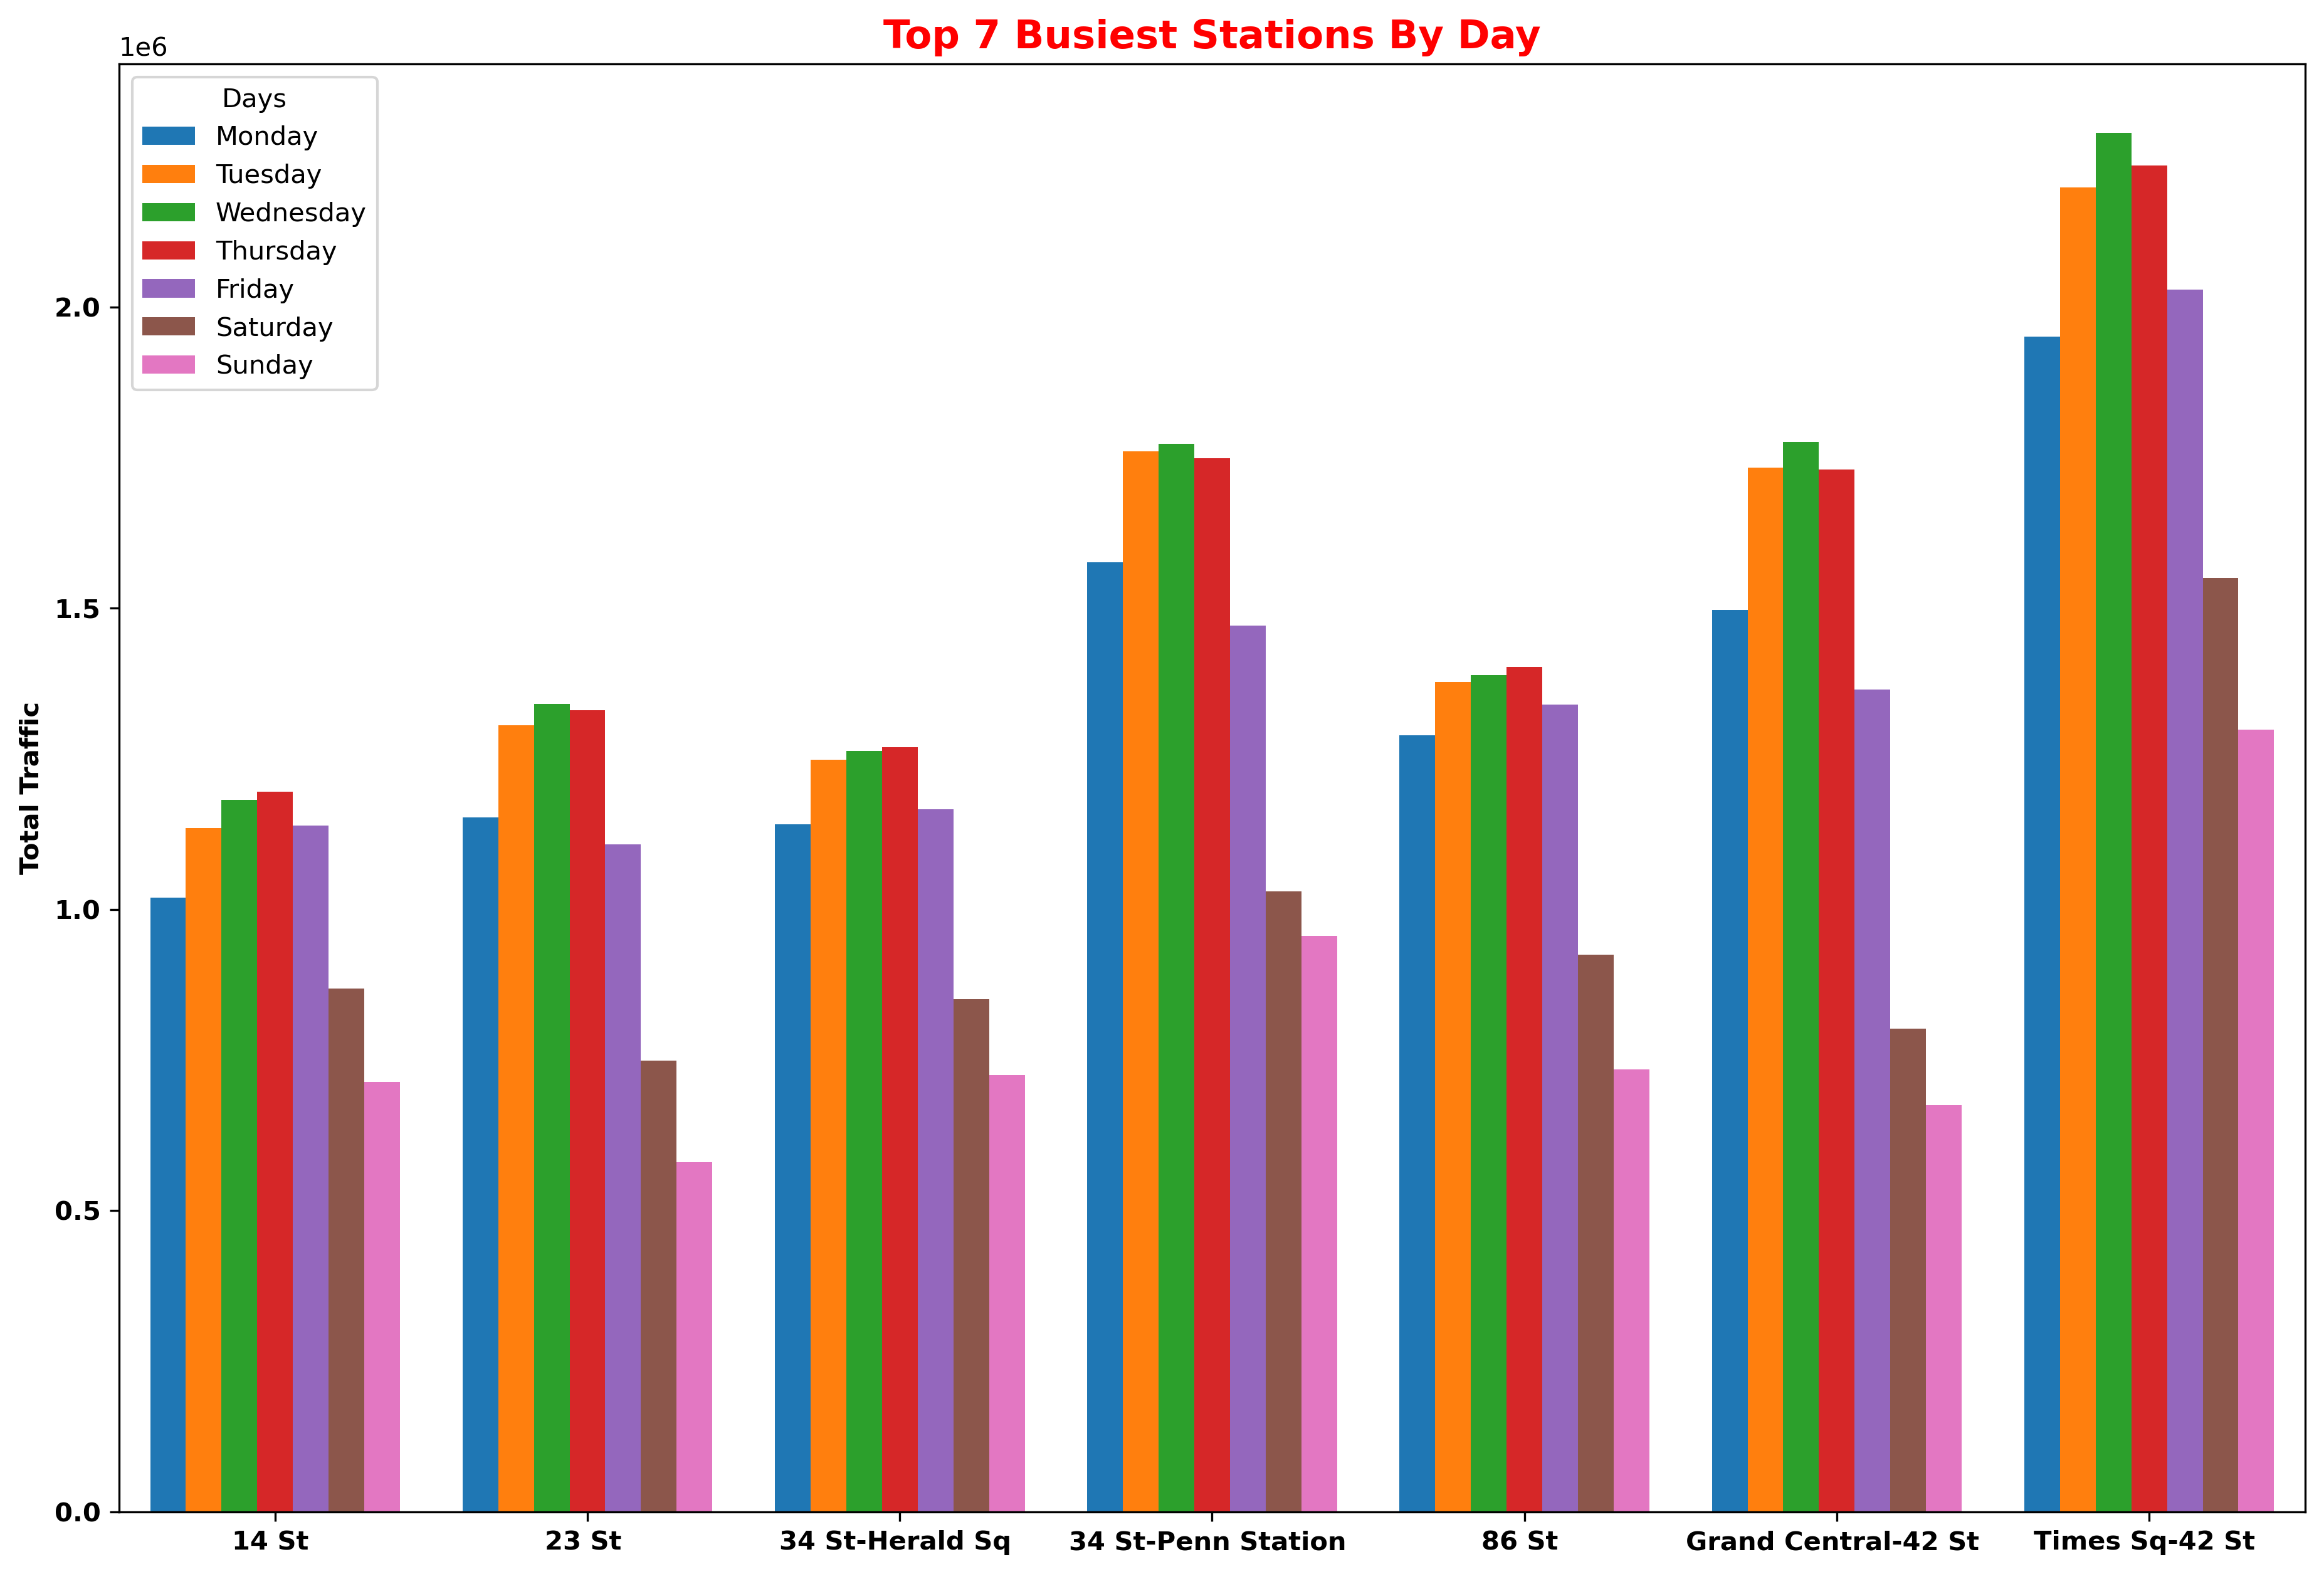

In [40]:
plt.figure(figsize=(15,10),dpi=300),
plt.style.use('default')
ax = sns.barplot(x="station_complex", y="ridership", hue="day_of_week",data=g_top7_stations, saturation=1)
plt.title("Top 7 Busiest Stations By Day", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Days")
plt.show()